# Introduction to neuroengineering
# Homework 1

### Ana Daniela del Rio Pulido

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def voltage(sign, concentration_in, concentration_out):
  return sign*26.7*np.log(concentration_out/concentration_in)

def ohmic_model(V_K, V_Na=70.84, V_Cl=-98.49, g_K=10**(-2), g_Na=10**(-3), g_Cl=10**(-3)):
  return (g_K*V_K + g_Na*V_Na + g_Cl*V_Cl)/(g_K + g_Na + g_Cl)


def GHK_model(K_out=5, Na_out=142, Cl_out=200, K_in=148, Na_in=10, Cl_in=5,
              P_K=1, P_Na=0.03, P_Cl=0.1, R=8.314, T=310.15, F=96485.34):
  
  numerator   = P_K*K_out + P_Na*Na_out + P_Cl*Cl_in
  denominator = P_K*K_in  + P_Na*Na_in  + P_Cl*Cl_out

  return (R*T/F)*np.log(numerator/denominator)*1000 # For obtaining mV units

In [3]:
K_sign = 1
K_concentration_in = 148
K_concentration_out = 5

concentrations  =  [0.1*i+0.1 for i in range(1650)]
v_ohmic         =  np.zeros(len(concentrations))
v_GHK           =  np.zeros(len(concentrations))

for i in range(len(concentrations)):
  V_K         =  voltage(K_sign, K_concentration_in, concentrations[i])
  v_ohmic[i]  =  ohmic_model(V_K)
  v_GHK[i]    =  GHK_model(concentrations[i])

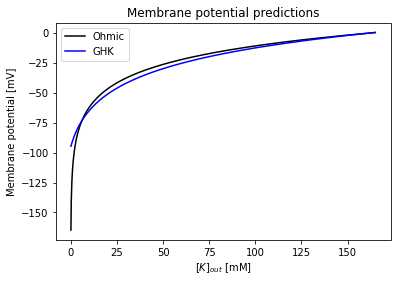

In [4]:
plt.plot(concentrations, v_ohmic, label ="Ohmic", color = "black")
plt.plot(concentrations, v_GHK, label ="GHK", color = "blue")
plt.xlabel("$[K]_{out}$ [mM]")
plt.ylabel("Membrane potential [mV]")
plt.title("Membrane potential predictions")
plt.legend()
plt.show()

In [5]:
percent_difference = [100*np.abs(v_ohmic[i]-v_GHK[i])/v_GHK[i] for i in range(len(v_ohmic))]

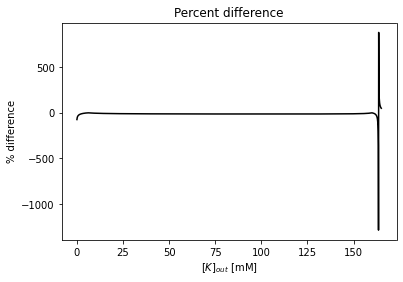

In [6]:
plt.plot(concentrations, percent_difference, color = "black")
plt.xlabel("$[K]_{out}$ [mM]")
plt.ylabel("% difference")
plt.title("Percent difference")
plt.show()

In [7]:
print(min(percent_difference))
print(np.where(percent_difference == min(percent_difference)))
print(concentrations[1634])

-1286.0693554560855
(array([1634]),)
163.5
